<h1>THÊM THƯ VIỆN</h1>
pip install pmdarima -- Cài đặt thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

<h1>NẠP DỮ LIỆU</h1>

In [2]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv("Q:/4. Learning/3nd year students/1. Data business analytics/Report Data Business Analytics/time-series-forecasting/Dataset/Microsoft_Stock.csv")
val_X = df[['Open']] #Biến ngoại sinh
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<h1>DATA ANALYSIS</h1>

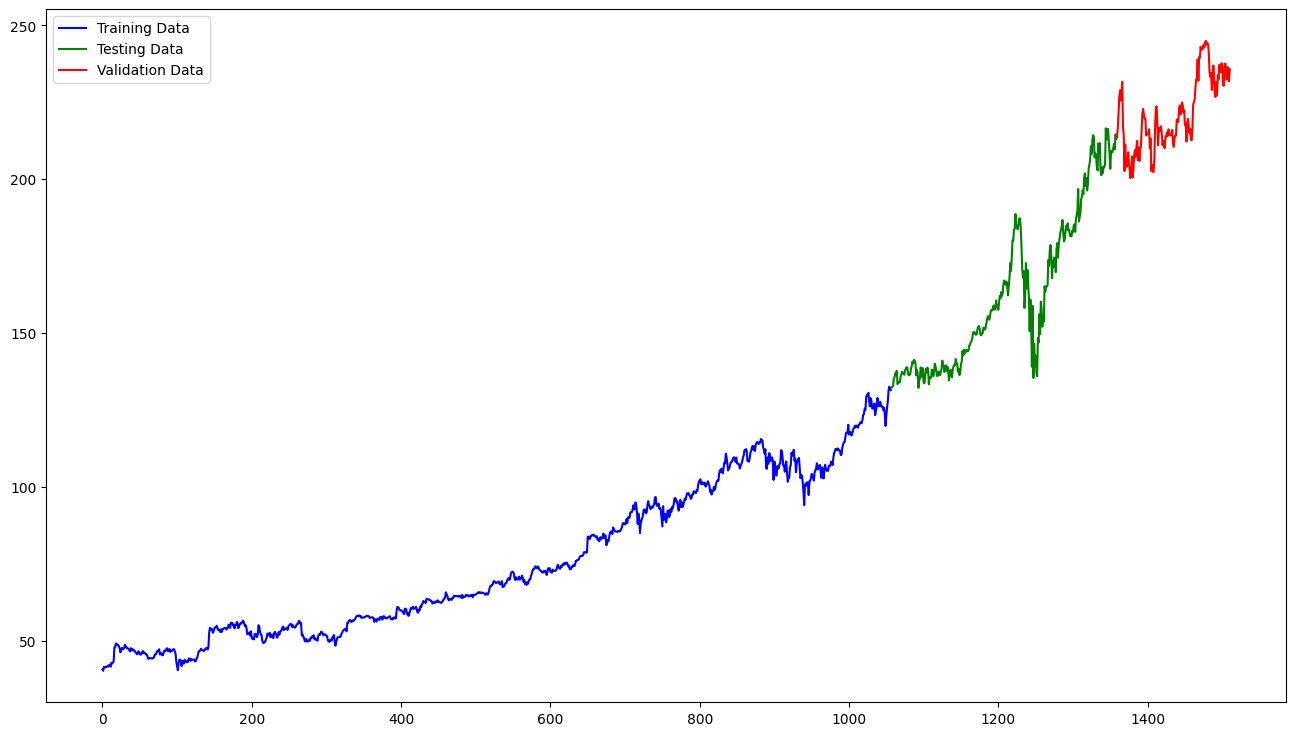

In [3]:
#Trực quan các tệp dữ liệu vừa chia
plt.figure(figsize=(16,9))
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.plot(val_data, 'red', label='Validation Data')
plt.legend()

<h1>XÂY DỰNG MÔ HÌNH SARIMA</h1>


In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best SARIMAX model
import pmdarima as pm
import statsmodels.api as sm
#model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
pre_model = pm.auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
# Fit the model
pre_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5285.137, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3729.348, Time=0.66 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4482.755, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5387.715, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3968.131, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3619.928, Time=2.02 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=5261.727, Time=2.02 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3613.359, Time=3.90 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3724.815, Time=1.48 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.10 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1057
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood               -1784.722
Date:                             Wed, 10 May 2023   AIC                           3587.443
Time:                                     15:00:08   BIC                           3632.009
Sample:                                          0   HQIC                          3604.345
                                            - 1057                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3293      0.082      4.014      0.000       0.169       0.490
ar.L1          0.8540      0.014     60.345      0.000       0.826       0.882
ar.L2         -0.8509      0.021    -40.075      0.000      -0.893      -0.809
ar.L3          0.8329      0.017     48.600      0.000       0.799       0.867
ma.L1          0.0149      0.008      1.831      0.067      -0.001       0.031
ma.L2          0.9790      0.009    107.811      0.000       0.961       0.997
ar.S.L12      -0.6068      0.024    -25.482      0.000      -0.653      -0.560
ar.S.L24      -0.3105      0.021    -14.630      0.000      -0.352      -0.269
sigma2         1.7395      0.042     41.115      0.000       1.657       1.822
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):              1109.28
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               4.49   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
pre_model = sm.tsa.statespace.SARIMAX(y_train,order=(3,0,2),seasonal_order =(2,1,0,12))
model = pre_model.fit()

c:\Users\TRAN VAN QUANG\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.00000000e+00 4.21427377e-04 7.87620083e-04 ... 1.30771281e+02
 1.31239106e+02 1.32402551e+02]


In [8]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

ValueError: operands could not be broadcast together with shapes (1057,) (152,) 

ValueError: x and y must have same first dimension, but have shapes (302,) and (1057,)

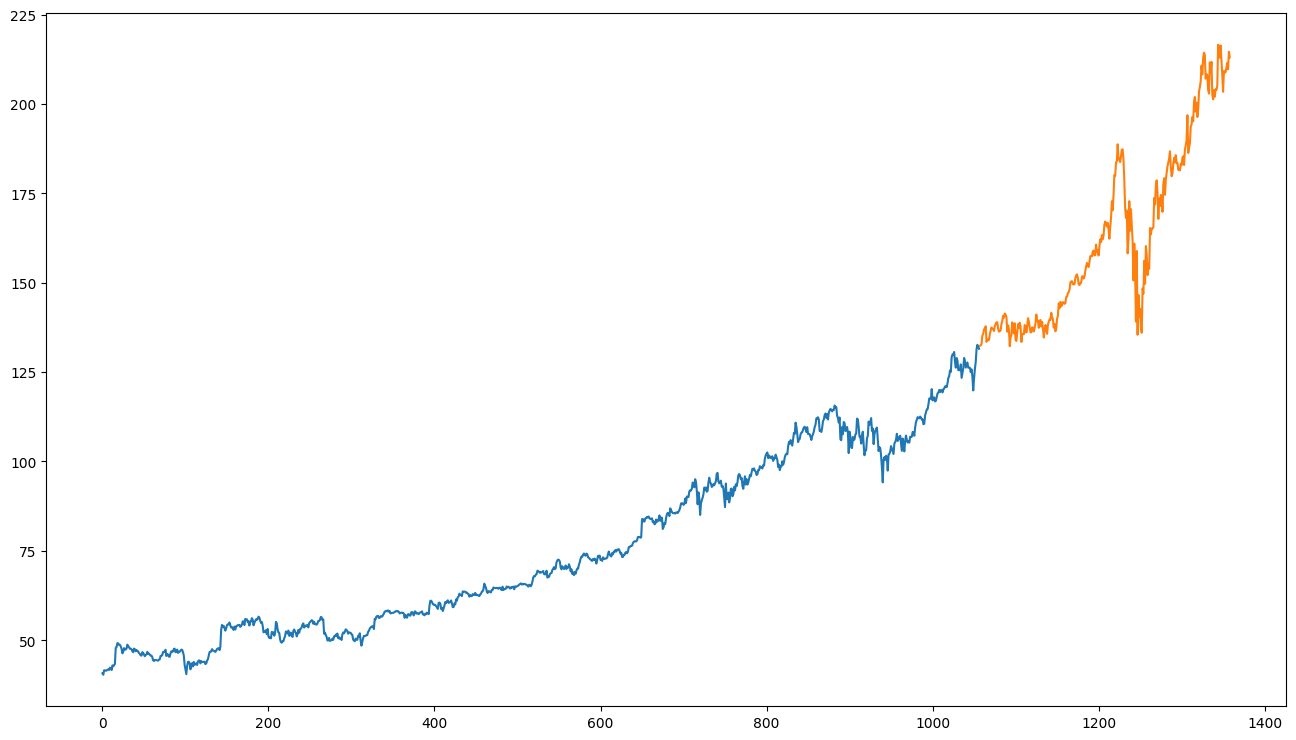

In [10]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1057, stop=1359, step=1)